# Árbol de decisión


Utilizamos el dataset de las plantas Iris desde esta ubicación:
https://www.openml.org/data/get_csv/61/dataset_61_iris.arff

Para ello, separaremos nuestro dataset: usaremos un 80% de los datos para entrenar los algoritmos y un 20% de los datos para hacer los tests de predicción. Ésta suele ser una proporción habitual.

Además, utilizaremos una validación cruzada estratificada de 10 veces (k-fold) para estimar la precisión del modelo.

Debido a problemas con los certificados en Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Cargamos las librerías necesarias:

In [2]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Cargamos el dataset:

In [3]:
url = "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"

In [4]:
dataset = read_csv(url)

Dividimos el dataset en 80% de datos para entrenar y 20% para test:

In [5]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [6]:
print(dataset)

     sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


Realizamos predicciones con el dataset de validación:

In [7]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Damos detalles sobre el modelo:

In [8]:
print(model)

DecisionTreeClassifier()


Evaluamos las predicciones, en primer lugar la precisión obtenida:

In [9]:
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


Ahora la matriz de confusión:

In [10]:
print(confusion_matrix(Y_validation, predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Un informe de clasificación:

In [11]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Predicción de ejemplo:

In [12]:
print(model.predict([[6.0, 3.0, 5.0, 2.0]]))

['Iris-virginica']


Dibujamos el árbol:

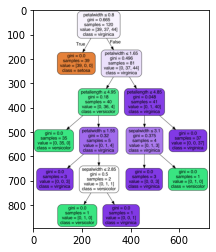

In [13]:
data = tree.export_graphviz(model, out_file=None, feature_names=dataset.columns.values[0:4], class_names=["setosa", "versicolor", "virginica"], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()